In [17]:
#importing pandas numpy keras-in-tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpim
import matplotlib.pyplot as plt

from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
#from keras import backend as K

Using TensorFlow backend.


In [2]:
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices()) #CPU & GPU info

In [2]:
#read train and test data into pandas dataframes
fashion_data = pd.read_csv("C:/Users/admin/Documents/datasets/fashion/fashion-mnist_train.csv")
test_data = pd.read_csv("C:/Users/admin/Documents/datasets/fashion/fashion-mnist_test.csv")

In [3]:
objects = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

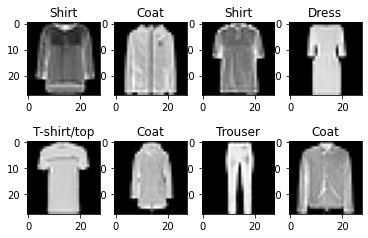

In [4]:
f, axes = plt.subplots(2, 4)
for row in axes:
    for axe in row:
        index = np.random.randint(10000)
        img = np.array(fashion_data.iloc[index, 1:]).reshape((28, 28))
        obj = fashion_data.iloc[index, 0]
        axe.imshow(img, cmap='gray')
        axe.set_title(objects[obj])

In [5]:
nsample = fashion_data.shape[0] #number of samples in training set
pixellen = 28 #pixel length
pixelht = 28 #pixel height
num_classes = 10 #number of apparel classes
batch_size = 128 #batch size of each iteration in training the network
epochs = 10 #number of epochs of training the network

In [6]:
#function data_prepare to prepare the data 
def data_prepare(data, denominator):
    y = pd.get_dummies(data['label']).values
    out_x = data.filter(regex = 'pixel')
    x = out_x.values.reshape(data.shape[0], pixellen, pixelht, 1)/255
    return [x,y]


In [7]:
#prepare test and training data
[x_train,y_train] = data_prepare(fashion_data, 255)
[x_test,y_test] = data_prepare(test_data, 255)

In [18]:
acc_table = pd.DataFrame(index = ['Classifier','Preprocessing','test_loss','test_accuracy'])

In [19]:
#basic model {2 Conv + pooling}{No preprocessing}{fash1}
fash1 = Sequential()
fash1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(pixellen, pixelht, 1)))
fash1.add(Conv2D(64, (3, 3), activation='relu'))
fash1.add(MaxPooling2D(pool_size=(2, 2)))
fash1.add(Dropout(0.25))
fash1.add(Flatten())
fash1.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
fash1.add(Dense(num_classes, activation='softmax'))

In [20]:
fash1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Nadam',
              metrics=['accuracy'])


In [21]:
fash1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [22]:
fash1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 163us/step - loss: 0.4265 - accuracy: 0.8484 - val_loss: 0.2935 - val_accuracy: 0.8988
Epoch 2/10
48000/48000 [==============================] - 7s 155us/step - loss: 0.2562 - accuracy: 0.9064 - val_loss: 0.2516 - val_accuracy: 0.9115
Epoch 3/10
48000/48000 [==============================] - 7s 155us/step - loss: 0.2015 - accuracy: 0.9249 - val_loss: 0.2294 - val_accuracy: 0.9202
Epoch 4/10
48000/48000 [==============================] - 8s 157us/step - loss: 0.1618 - accuracy: 0.9390 - val_loss: 0.2334 - val_accuracy: 0.9187
Epoch 5/10
48000/48000 [==============================] - 8s 162us/step - loss: 0.1328 - accuracy: 0.9500 - val_loss: 0.2231 - val_accuracy: 0.9226
Epoch 6/10
48000/48000 [==============================] - 8s 159us/step - loss: 0.1054 - accuracy: 0.9601 - val_loss: 0.2726 - val_accuracy: 0.9188
Epoch 7/10
48000/48000 [==============================] - 8s 1

In [23]:
score = np.array(fash1.evaluate(x_test, y_test, verbose=0))
acc_table['fash1'] = ["2 Conv + pooling", "None", score.round(3)[0], score.round(3)[1]]
print(acc_table['fash1'])

Classifier       2 Conv + pooling
Preprocessing                None
test_loss                    0.28
test_accuracy               0.929
Name: fash1, dtype: object


In [13]:
#{2 Conv + 2 Conv pooling + BatchNorm}{No preprocessing}{fash2}
fash2 = Sequential()

fash2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
fash2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
fash2.add(MaxPooling2D(pool_size=(2,2)))
fash2.add(Dropout(0.25))


#fash2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                 activation ='relu'))
#fash2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                 activation ='relu'))
#fash2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#fash2.add(Dropout(0.25))


fash2.add(Flatten())
fash2.add(Dense(128, activation = "relu"))
fash2.add(BatchNormalization())
fash2.add(Dropout(0.5))
fash2.add(Dense(10, activation = "softmax"))
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
fash2.compile(optimizer = "RMSprop" , loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
fash2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Nadam',
              metrics=['accuracy'])


In [15]:
fash2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

In [16]:
fash2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 288us/step - loss: 0.4394 - accuracy: 0.8469 - val_loss: 0.3273 - val_accuracy: 0.8877
Epoch 2/10
48000/48000 [==============================] - 12s 245us/step - loss: 0.3012 - accuracy: 0.8924 - val_loss: 0.2676 - val_accuracy: 0.9049
Epoch 3/10
48000/48000 [==============================] - 13s 272us/step - loss: 0.2661 - accuracy: 0.9042 - val_loss: 0.2713 - val_accuracy: 0.9020
Epoch 4/10
48000/48000 [==============================] - 13s 276us/step - loss: 0.2384 - accuracy: 0.9128 - val_loss: 0.2623 - val_accuracy: 0.9070
Epoch 5/10
48000/48000 [==============================] - 13s 277us/step - loss: 0.2196 - accuracy: 0.9198 - val_loss: 0.2915 - val_accuracy: 0.8983
Epoch 6/10
48000/48000 [==============================] - 12s 260us/step - loss: 0.2037 - accuracy: 0.9249 - val_loss: 0.2345 - val_accuracy: 0.9162
Epoch 7/10
48000/48000 [==============================] 

In [24]:
score = np.array(fash2.evaluate(x_test, y_test, verbose=0))
acc_table['fash2'] = ["2 Conv + pooling + BN", "None", score.round(3)[0], score.round(3)[1]]
print(acc_table['fash2'])

Classifier       2 Conv + pooling + BN
Preprocessing                     None
test_loss                        0.206
test_accuracy                    0.927
Name: fash2, dtype: object


In [26]:
acc_table

,fash1,fash2
Classifier,2 Conv + pooling,2 Conv + pooling + BN
Preprocessing,None,None
test_loss,0.28,0.206
test_accuracy,0.929,0.927
